In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Image edges and image deriatives

In [3]:
def sigmoid(x, s=1.0, t=0.0):
    return 1./(1.+np.exp(-s*(x-t)))

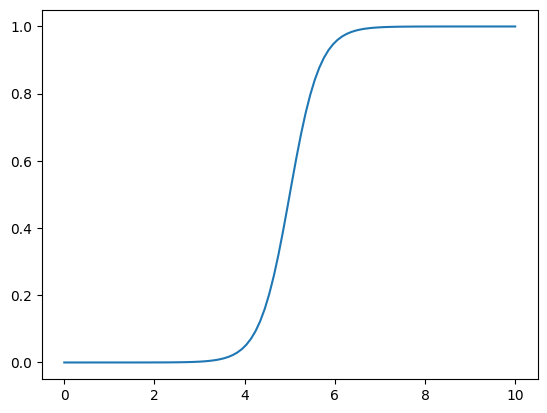

In [4]:
x = np.linspace(0,10,100)
plt.plot(x, sigmoid(x, s=3, t=5))

Text(0, 0.5, 'Height ($y$)')

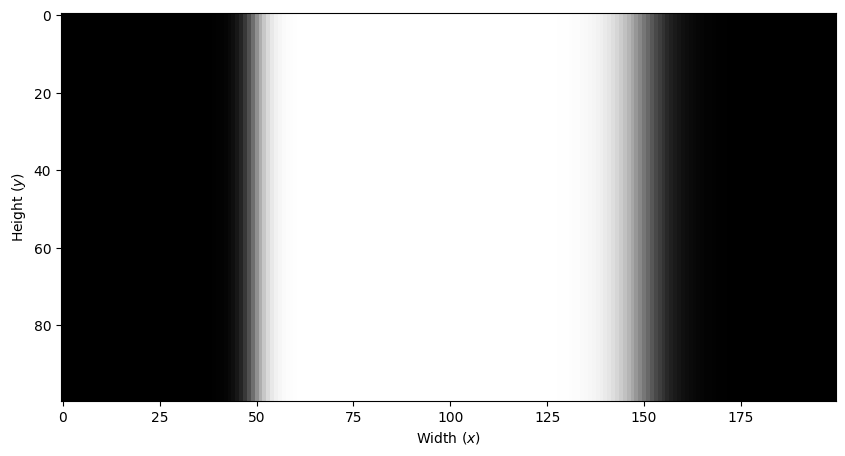

In [5]:
# im = np.zeros([100,200])
# for i in range(100):
#     im[i,:] = np.hstack([sigmoid(x, s=5, t=5), 1-sigmoid(x, s=2.5, t=5)])

# The following does exactly what the for-loop shown above does
import numpy.matlib as matlab
im = matlab.repmat(np.hstack([sigmoid(x, s=5, t=5), 1-sigmoid(x, s=2.5, t=5)]), 100,1)    
    
plt.figure(figsize=(10,7))
plt.imshow(im, cmap='gray')
plt.xlabel('Width ($x$)')
plt.ylabel('Height ($y$)')

Text(0, 0.5, '$I(x)$')

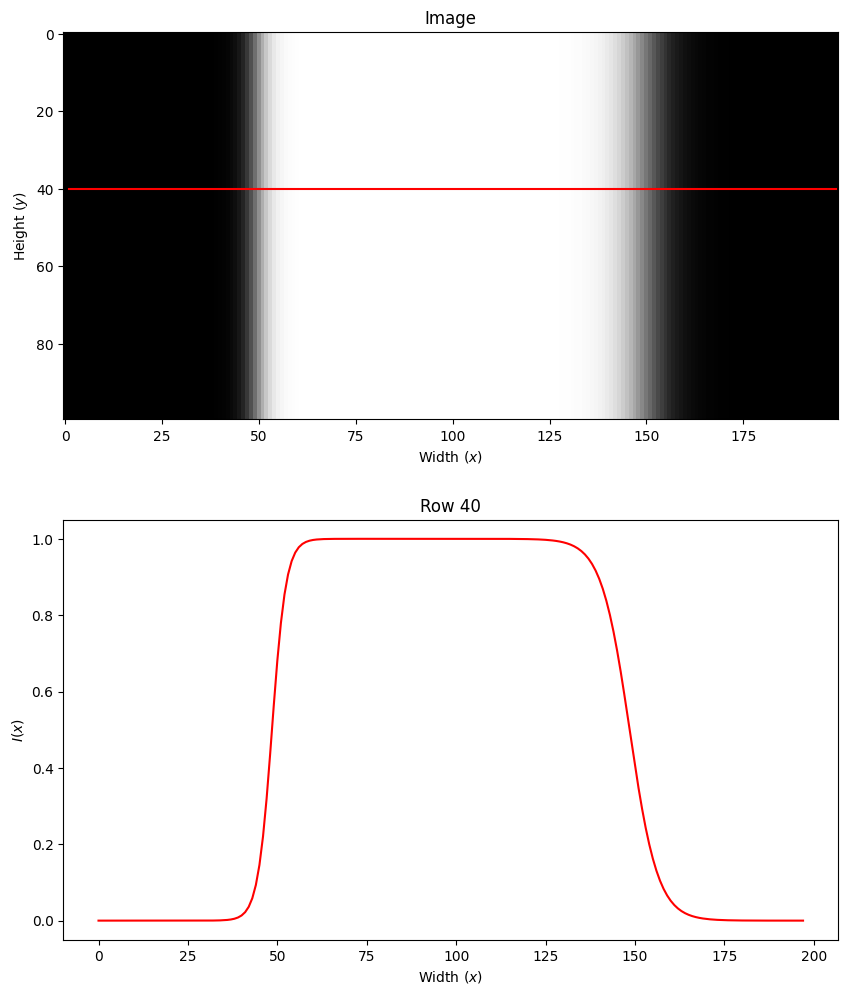

In [6]:
plt.figure(figsize=(10,12))
plt.subplot(211)
plt.imshow(im, cmap='gray')
plt.title('Image')
plt.plot([1,199],[40,40],'r-')
plt.xlabel(r'Width ($x$)')
plt.ylabel(r'Height ($y$)')
plt.subplot(212)
plt.title('Row 40')
plt.plot(im[40,1:199],'r')
plt.xlabel(r'Width ($x$)')
plt.ylabel(r'$I(x)$')

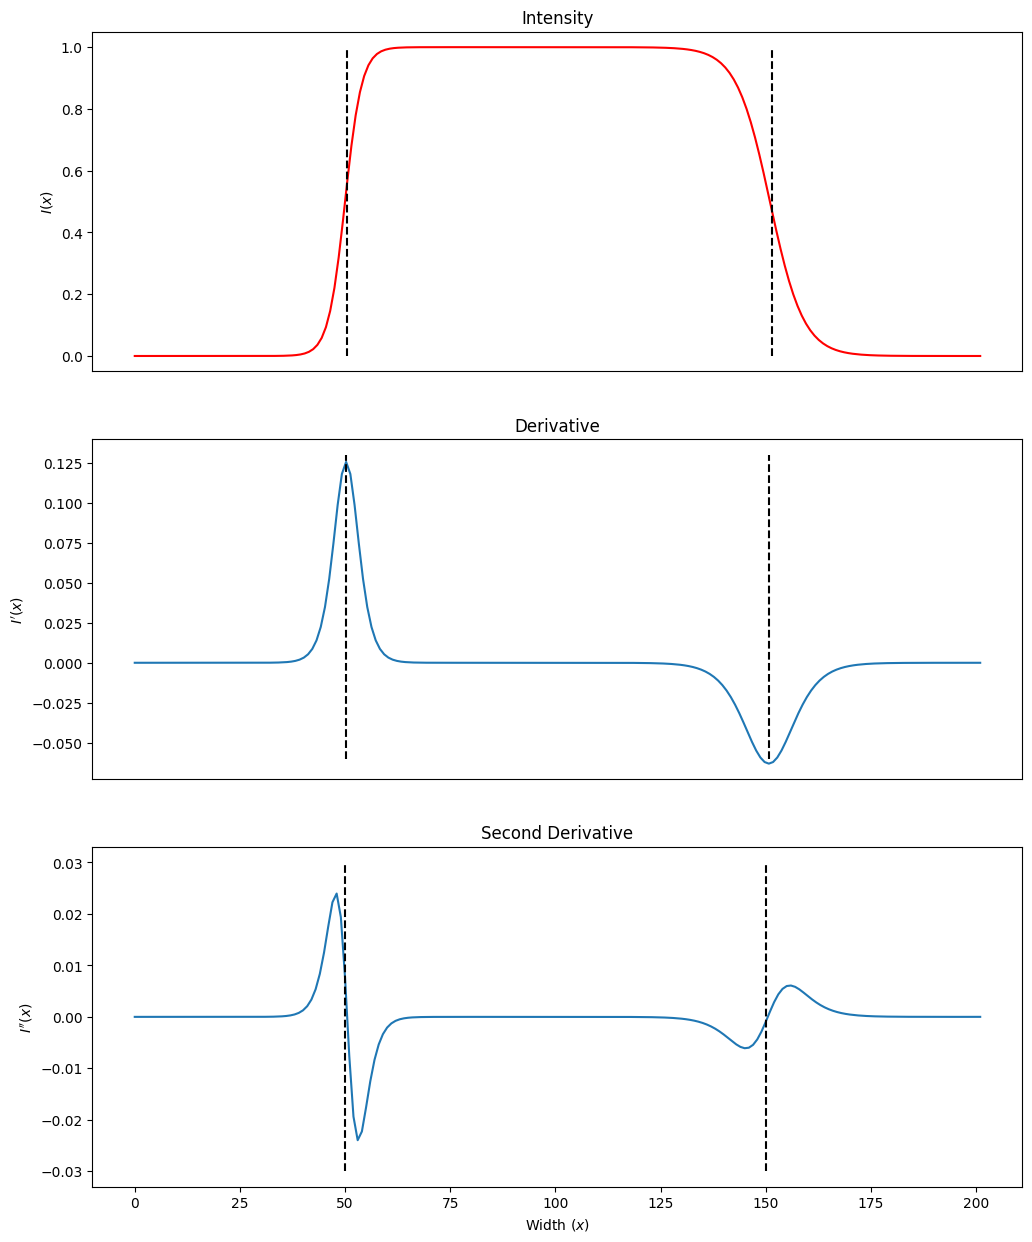

In [7]:
Hx = [1,-1]
dx = np.convolve(im[0,:], Hx)
d2x = np.convolve(dx, Hx)
plt.figure(figsize=(12,15))
plt.subplot(311)
plt.title('Intensity')
plt.plot(im[0,:],'r')
plt.xticks([])
#plt.xlabel(r'Width ($x$)')
plt.ylabel(r'$I(x)$')
#plt.plot([100,100],[0,1],'k--')
plt.plot([150,150],[0,1],'k--')
plt.plot([50,50],[0,1],'k--')
plt.subplot(312)
#plt.xlabel(r'Width ($x$)')
plt.ylabel(r"$I'(x)$")
plt.title('Derivative')
plt.plot(dx)
plt.xticks([])
#plt.plot([100,100],[-0.04,0.08],'k--')
plt.plot([50,50],[-0.06,0.13],'k--')
plt.plot([150,150],[-0.06,0.13],'k--')
plt.subplot(313)
plt.xlabel(r'Width ($x$)')
plt.ylabel(r"$I''(x)$")
plt.title('Second Derivative')
plt.plot(d2x)
#plt.plot([100,100],[-0.01,0.01],'k--')
plt.plot([50,50],[-0.03,0.03],'k--')
plt.plot([150,150],[-0.03,0.03],'k--')

In [8]:
import cv2
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Kernel for computing image gradients

([], [])

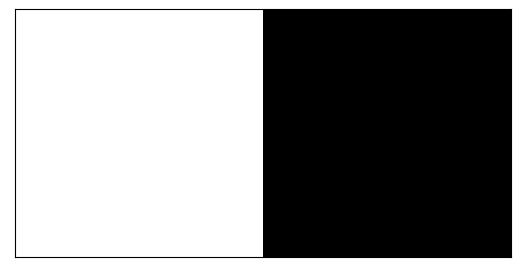

In [10]:
# flipped since convolution is flips
Hx = np.array([[1,-1]], dtype='float32')
Hy = np.array([[1],[-1]], dtype='float32')

plt.imshow(Hx, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], [])

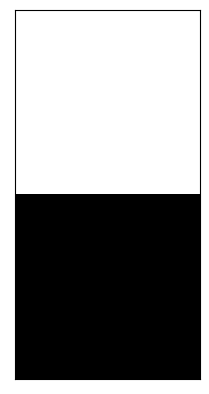

In [11]:
plt.imshow(Hy, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

In [12]:
# Square

([], [])

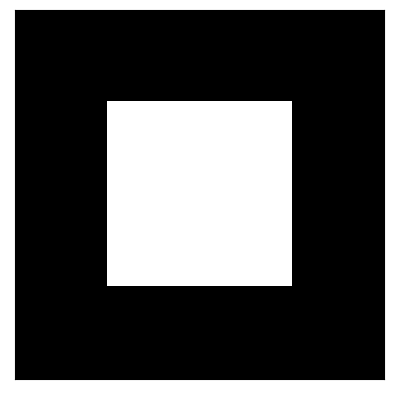

In [13]:
square = np.zeros((32,32), dtype='float32')
square[8:8+16, 8:8+16] = 1.0

plt.imshow(square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], [])

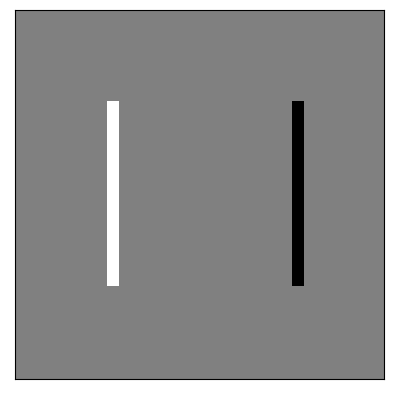

In [14]:
Hx_square = sp.signal.convolve2d(square, Hx, 'same')

plt.imshow(Hx_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

([], [])

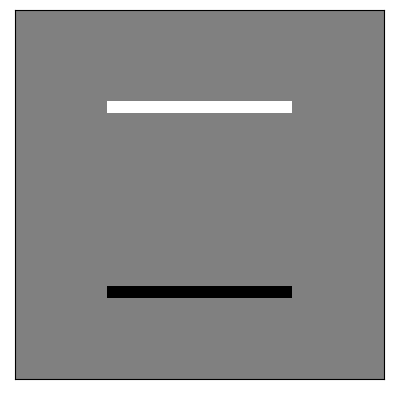

In [15]:
Hy_square = sp.signal.convolve2d(square, Hy, 'same')

plt.imshow(Hy_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

In [16]:
# Gradient magnitude

Text(0.5, 1.0, 'Y derivative')

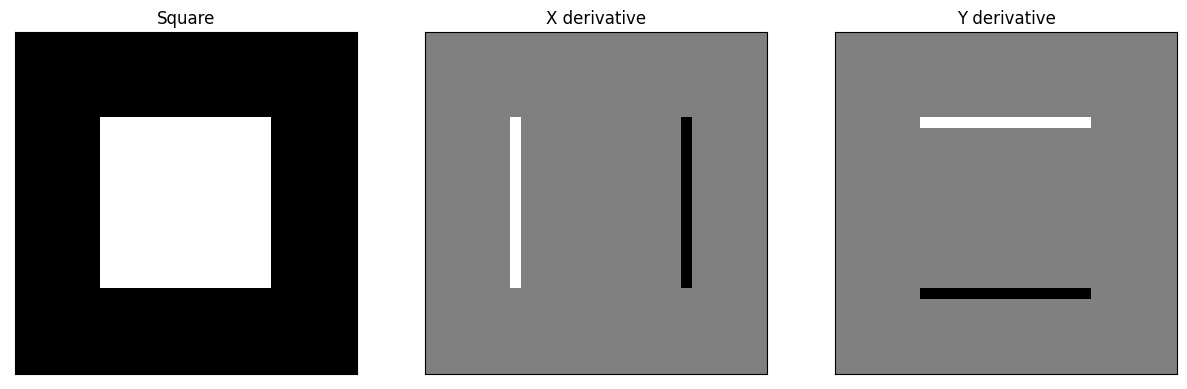

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Square')
plt.subplot(132)
plt.imshow(Hx_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('X derivative')
plt.subplot(133)
plt.imshow(Hy_square, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Y derivative')

Text(0.5, 1.0, 'Gradient magnitude')

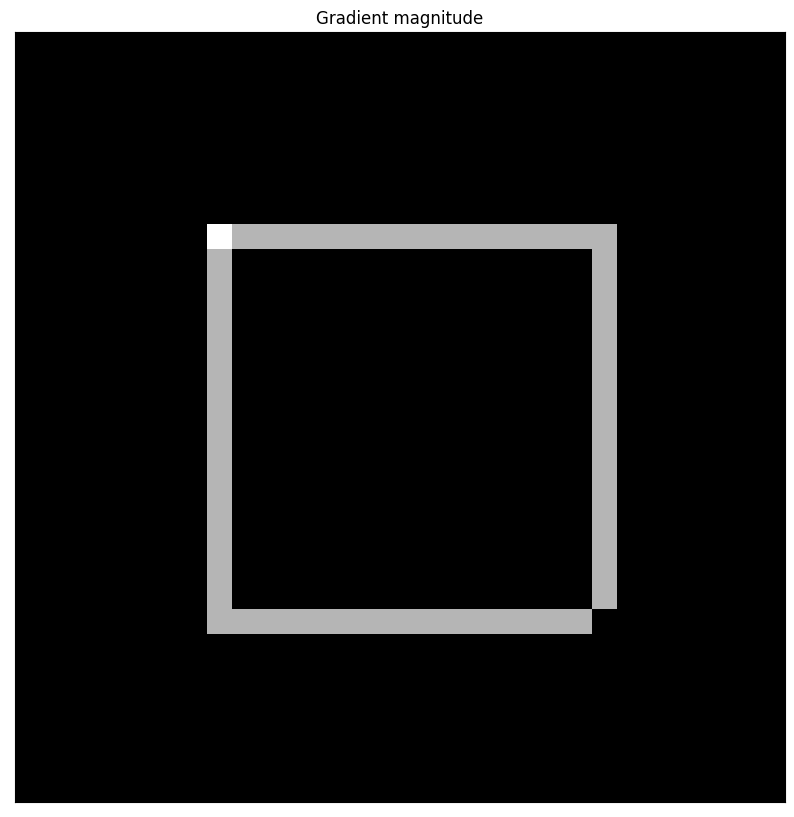

In [18]:
square_grad_mag = np.sqrt(np.square(Hx_square) + np.square(Hy_square))
plt.figure(figsize=(10,10))
plt.imshow(square_grad_mag, cmap='gray', interpolation='none')

plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude')

In [19]:
# Gradient direction

([], [])

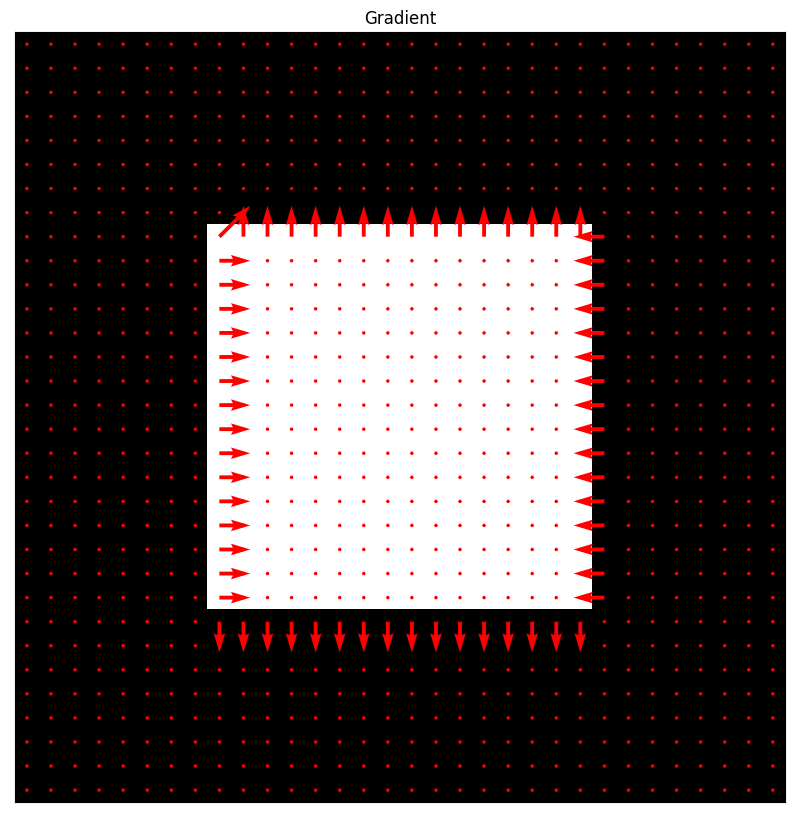

In [20]:
square_grad_angle = np.arctan2(Hy_square, Hx_square)

plt.figure(figsize=(10,10))
x_c, y_c = np.linspace(0,31,32), np.linspace(0,31,32)
xx, yy = np.meshgrid(x_c, y_c)
plt.quiver(xx, yy, Hx_square, Hy_square, scale=25, color='red', width=.005)
plt.imshow(square, cmap='gray')
plt.title('Gradient')
plt.xticks([])
plt.yticks([])

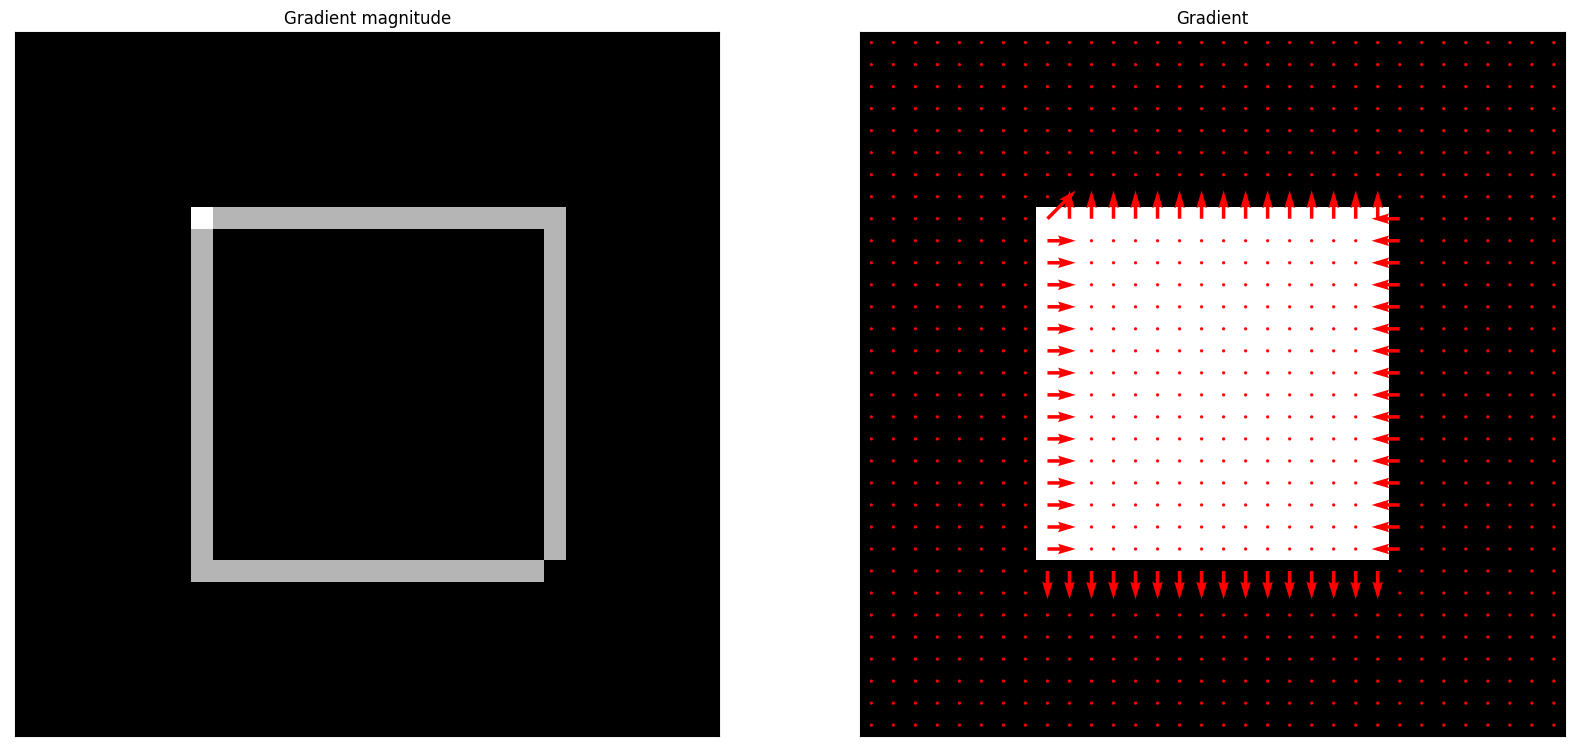

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(square_grad_mag, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude')
plt.subplot(122)
plt.quiver(xx, yy, Hx_square, Hy_square, scale=25, color='red', width=.005)
plt.imshow(square, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Gradient');

In [22]:
# Circle

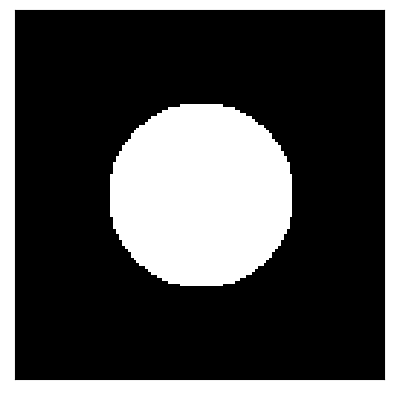

In [23]:
s = 128
circle = np.zeros((s,s), dtype='float32')

import math
cx, cy = 128./2, 128./2
for i in range(0, s-1):
    for j in range(0, s-1):
        if math.sqrt( (cx - i)**2 + (cy - j)**2 ) < 128./4:
            circle[i,j] = 1.0
            
plt.imshow(circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([]);

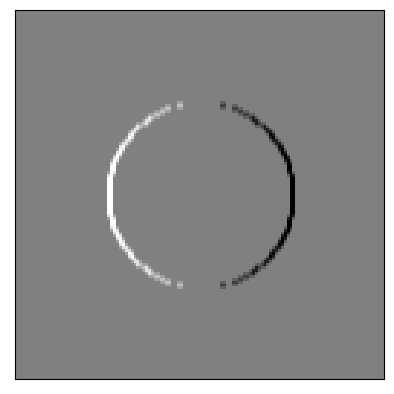

In [24]:
Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

Hx_circle = sp.signal.convolve2d(circle, Hx, 'same')

plt.imshow(Hx_circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([]);

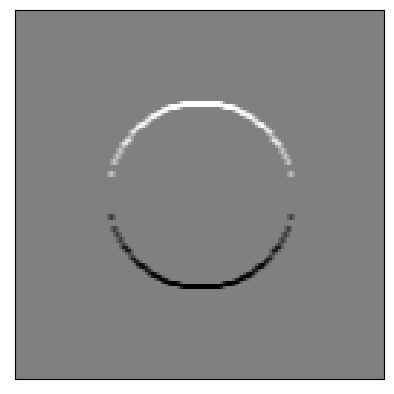

In [25]:
Hy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Hy_circle = sp.signal.convolve2d(circle, Hy, 'same')

plt.imshow(Hy_circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([]);

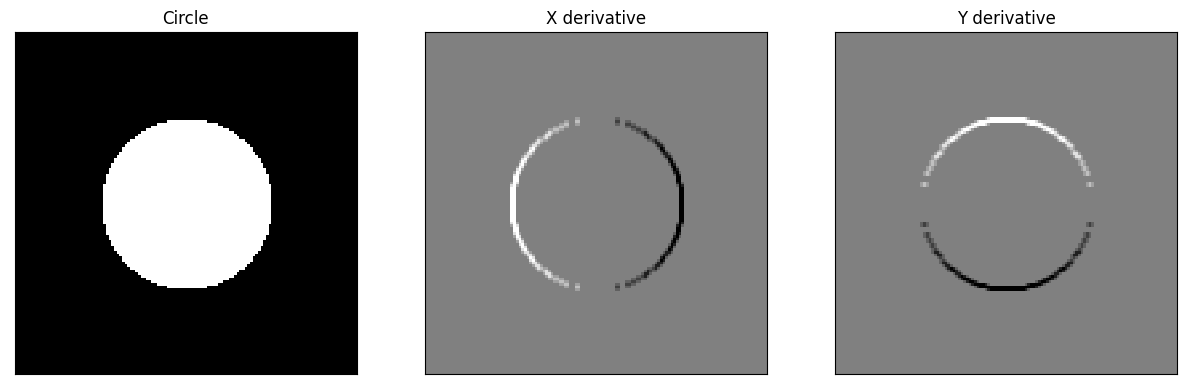

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Circle')
plt.subplot(132)
plt.imshow(Hx_circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('X derivative')

plt.subplot(133)
plt.imshow(Hy_circle, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Y derivative');

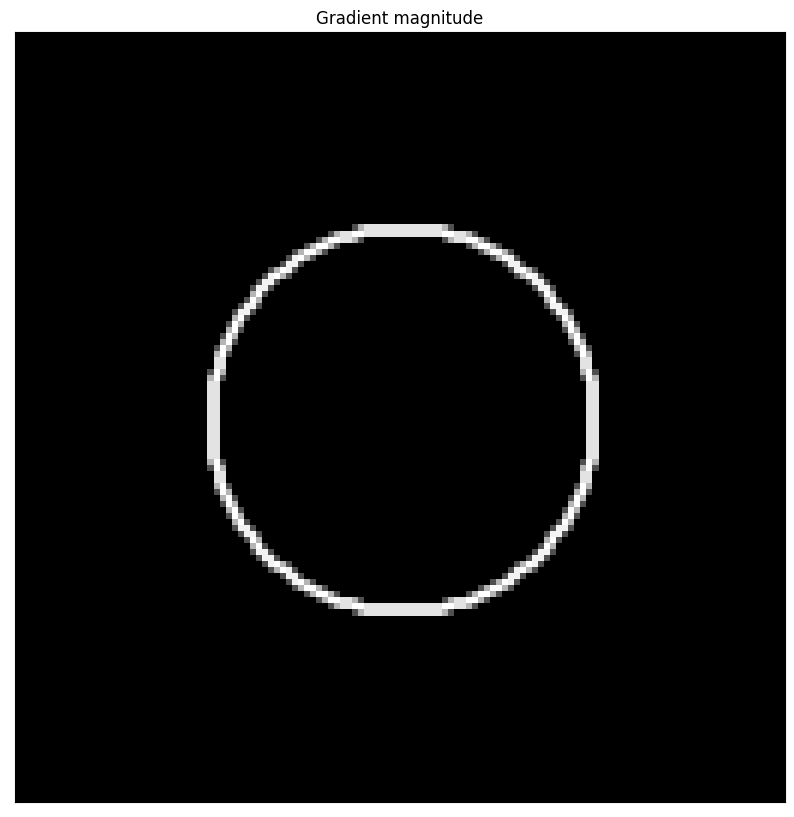

In [27]:
# Gradient magnitude
circle_grad_mag = np.sqrt(np.square(Hx_circle) + np.square(Hy_circle))
plt.figure(figsize=(10,10))
plt.imshow(circle_grad_mag, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude');

In [28]:
# Gradient direction

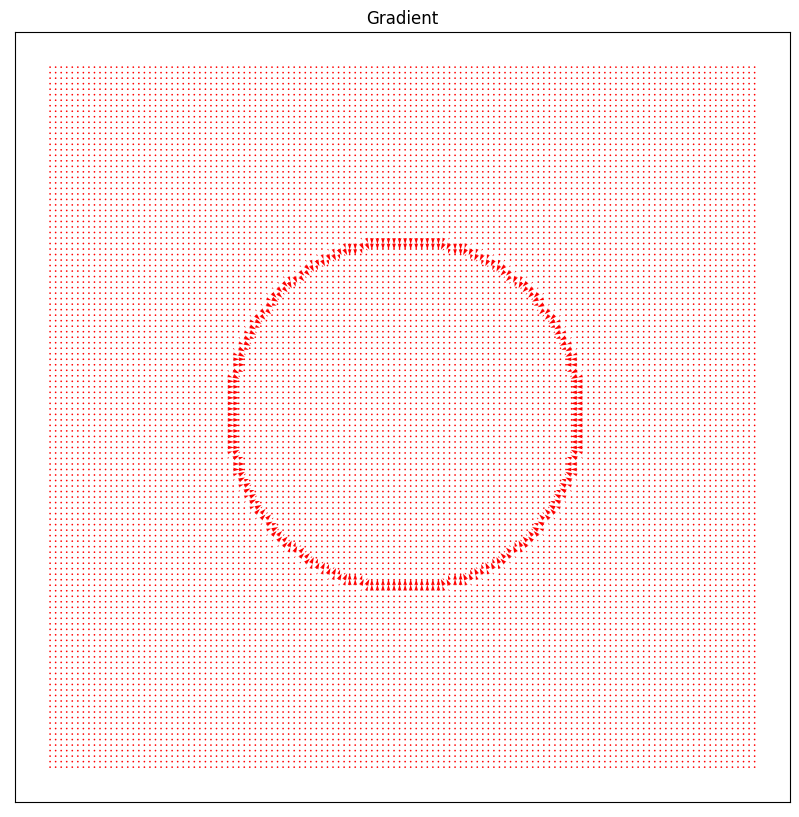

In [29]:
circle_grad_angle = np.arctan2(Hy_circle, Hx_circle)

plt.figure(figsize=(10,10))
x_c, y_c = np.linspace(0,127,128), np.linspace(0,127,128)
xx, yy = np.meshgrid(x_c, y_c)
plt.quiver(xx, yy, Hx_circle, Hy_circle, scale=500, color='red')
#plt.imshow(circle, cmap='gray')
plt.title('Gradient')
plt.xticks([])
plt.yticks([]);

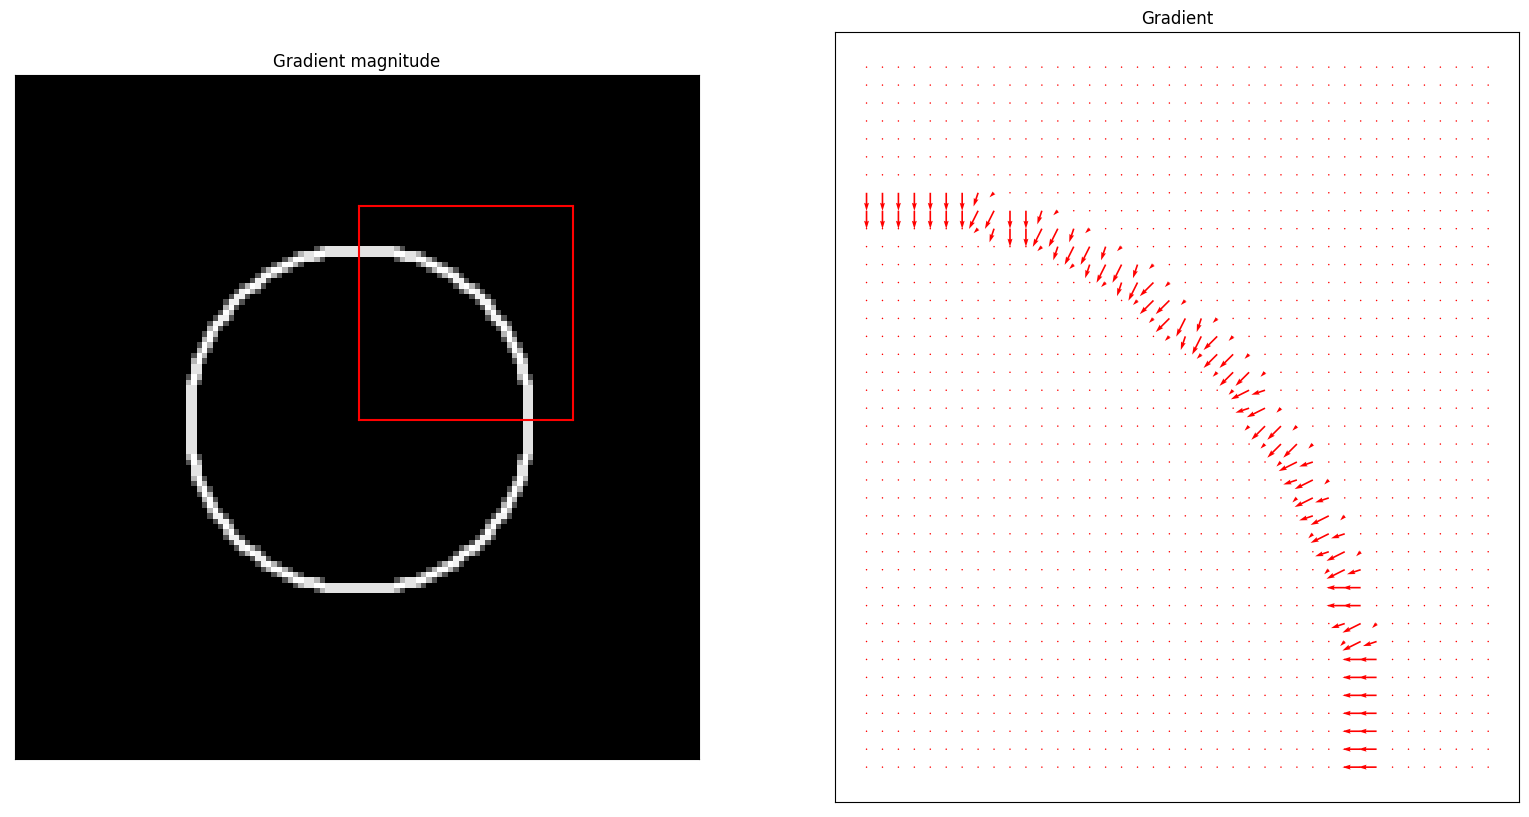

In [30]:
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.imshow(circle_grad_mag, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude')

plt.plot([64,104],[64,64], 'r')
plt.plot([64,104],[64-40,64-40], 'r')
plt.plot([64,64],[64,64-40], 'r')
plt.plot([104,104],[64,64-40], 'r')

plt.subplot(132)
# x_c, y_c = np.linspace(0,127,128), np.linspace(0,127,128)
# xx, yy = np.meshgrid(x_c, y_c)
# plt.quiver(xx, yy, Hx_circle, Hy_circle, scale=500, color='red')
# plt.imshow(circle, cmap='gray')
# plt.title('Gradient')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(133)
x_c, y_c = np.linspace(64,104,40), np.linspace(64,104,40)
xx, yy = np.meshgrid(x_c, y_c)
plt.quiver(xx, yy, Hx_circle[64:104,64:104], Hy_circle[64:104,64:104], scale=150, color='red')
#plt.imshow(circle[64:104,64:104], cmap='gray')
plt.title('Gradient')
plt.xticks([])
plt.yticks([]);

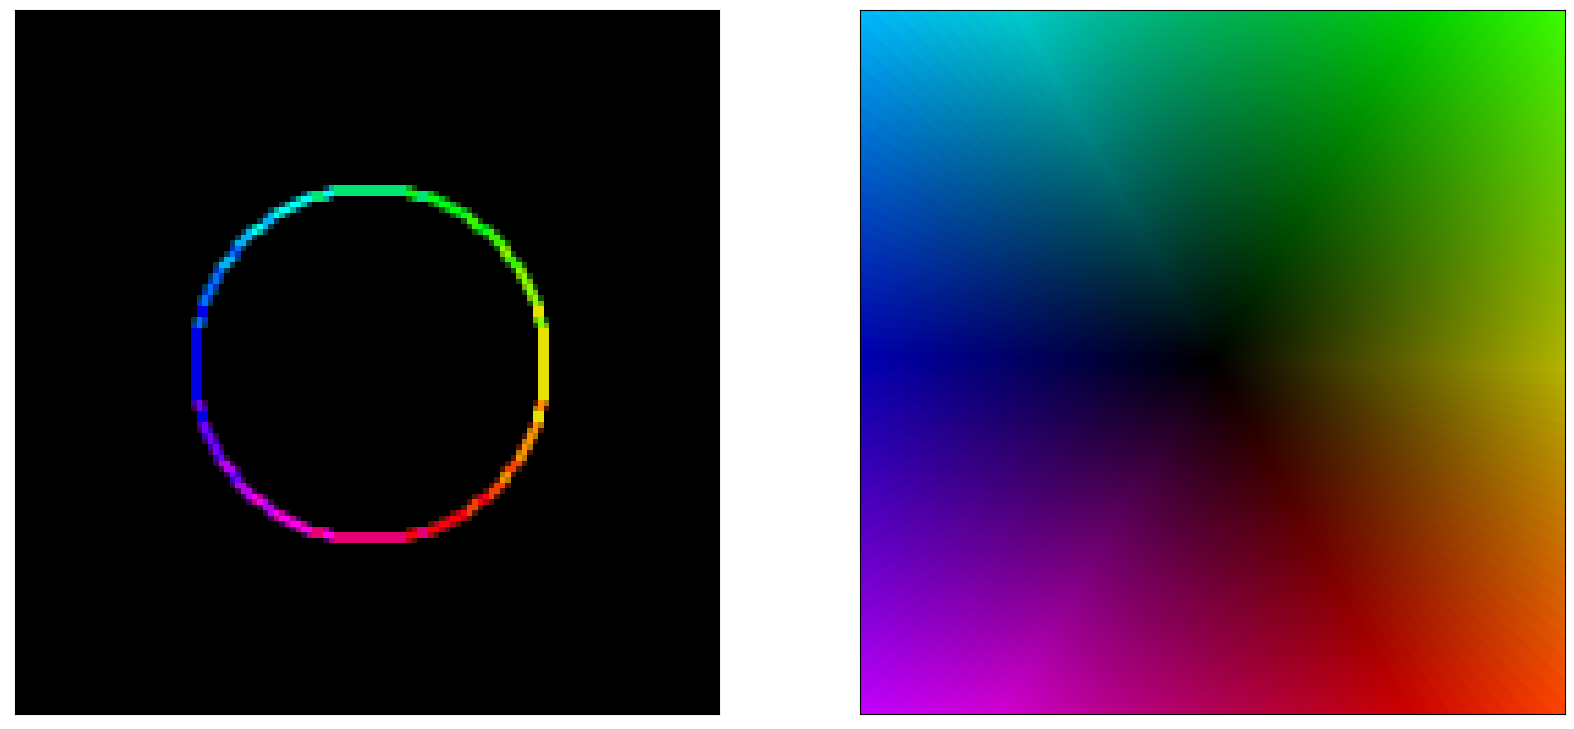

In [31]:
# Using color to visualize image gradients
hsv = np.zeros([circle.shape[0],circle.shape[0],3], dtype=np.uint8)
hsv[..., 1] = 255

mag, ang = cv2.cartToPolar(Hx_circle[...], Hy_circle[...])
# print(hsv.shape)
# print(mag.shape)
# print(ang.shape)
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(bgr)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
width = 1000
x = np.linspace(width, -width, width*2+1)
y = np.linspace(width, -width, width*2+1)
xx, yy = np.meshgrid(x, y)

hsv = np.zeros([x.shape[0], y.shape[0], 3], dtype='uint8')
hsv[..., 1] = 255

mag, ang = cv2.cartToPolar(xx[...], yy[...])
# print(hsv.shape)
# print(mag.shape)
# print(ang.shape)
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(bgr)
plt.xticks([])
plt.yticks([]);

In [32]:
# Effects of noise

In [33]:
# 1D kernel for computing derivatives
Hx = np.array([1,-1], dtype='float32')

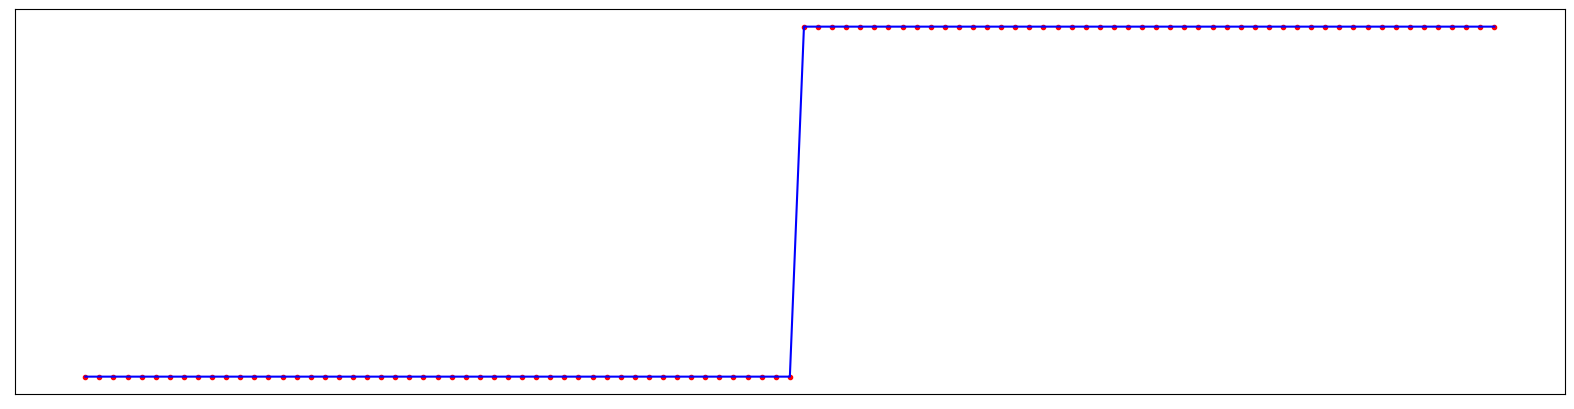

In [34]:
np.random.seed(0)

x = np.linspace(0,100,101)
y = np.ones(x.shape)*10
y[x <= 50] = 0
plt.figure(figsize=(20,5))
plt.plot(x, y, 'r.')
plt.plot(x, y, 'b')
plt.xticks([])
plt.yticks([]);

([], [])

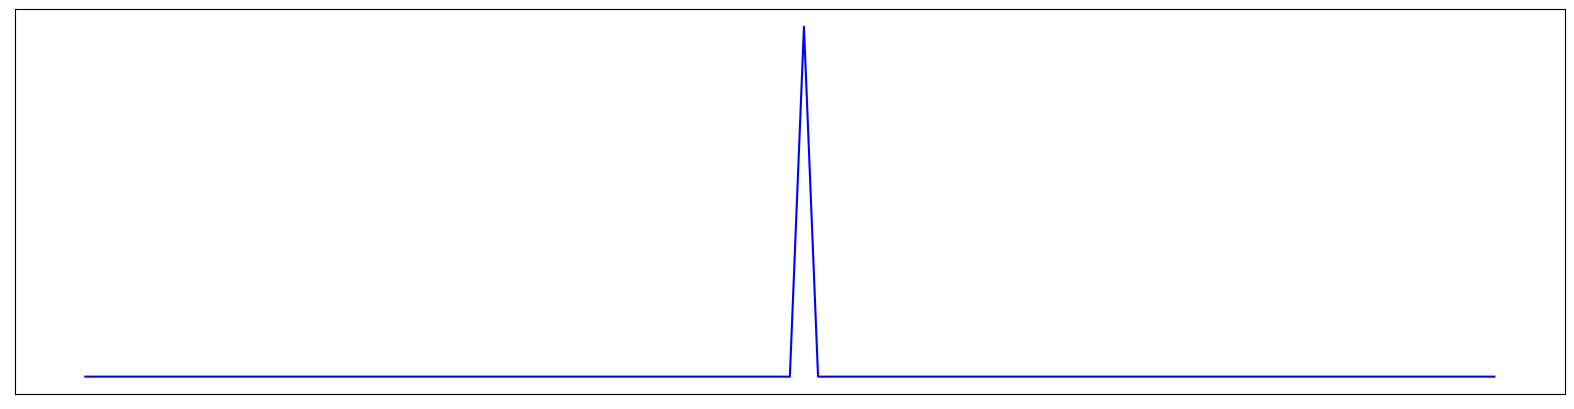

In [35]:
plt.figure(figsize=(20,5))
dy = np.convolve(y, Hx, 'same')
plt.plot(x, dy, 'b')
plt.xticks([])
plt.yticks([])

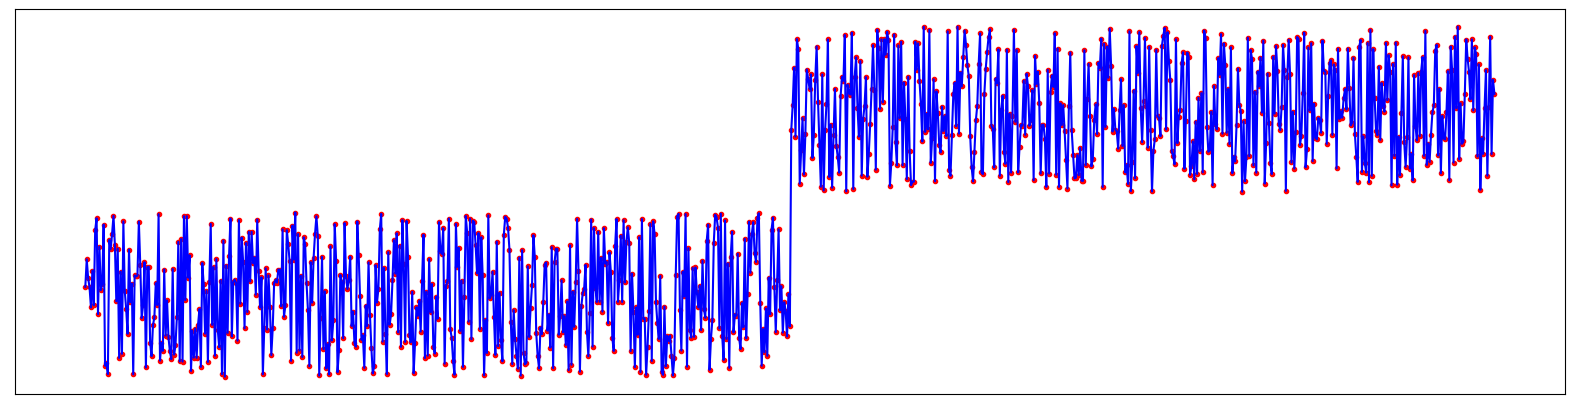

In [36]:
# Creating a noisy signal
x = np.linspace(0,1000,1001)
yn = np.ones(x.shape)*9
yn[x <= 500] = 0
yn = yn + np.random.rand(yn.shape[0])*8

plt.figure(figsize=(20,5))
plt.plot(x, yn, 'r.')
plt.plot(x, yn, 'b')
plt.xticks([])
plt.yticks([]);

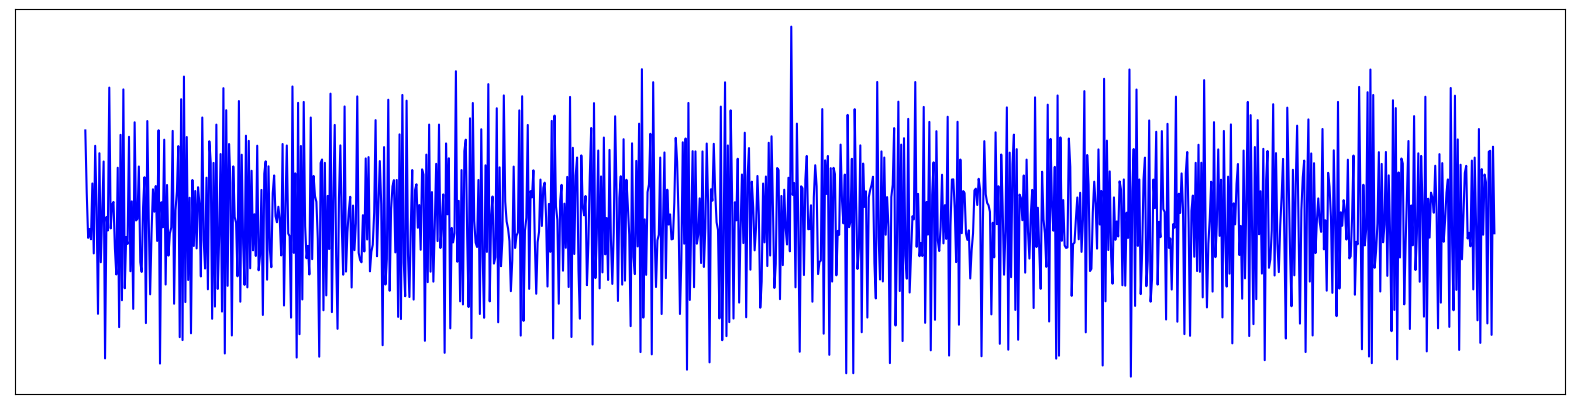

In [37]:
# Edge finding in noisy signal
dyn = np.convolve(yn, Hx, 'same')
plt.figure(figsize=(20,5))
plt.plot(x, dyn, 'b')
plt.xticks([])
plt.yticks([]);

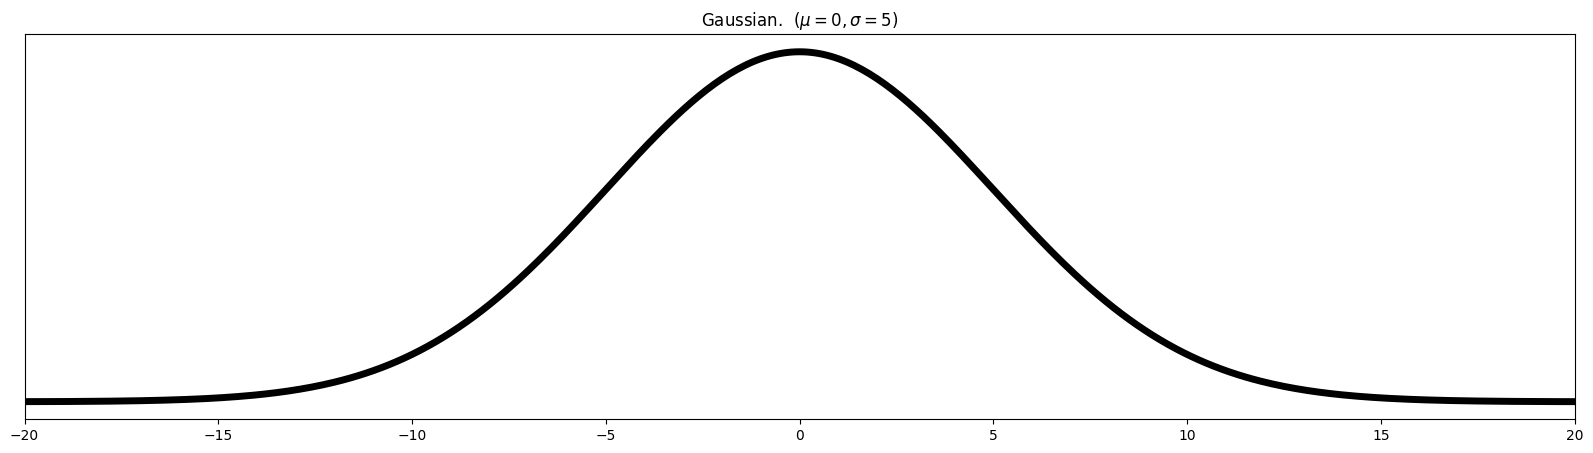

In [38]:
# 1D Gaussian
s = 4
ticks = np.linspace(-s,s,2*s+1)

gxx = np.linspace(-40,40,801)
mu = 0
sigma = 5
g = np.exp(- (gxx-mu)**2 / (2*(sigma**2)) ) / ( 2 * np.pi * sigma)

plt.figure(figsize=(20,5))
plt.plot(gxx, g, 'k', linewidth=5)
plt.xlim([-s*sigma, s*sigma])
plt.yticks([])
plt.title(r'Gaussian.  ($\mu=0, \sigma=5$)');

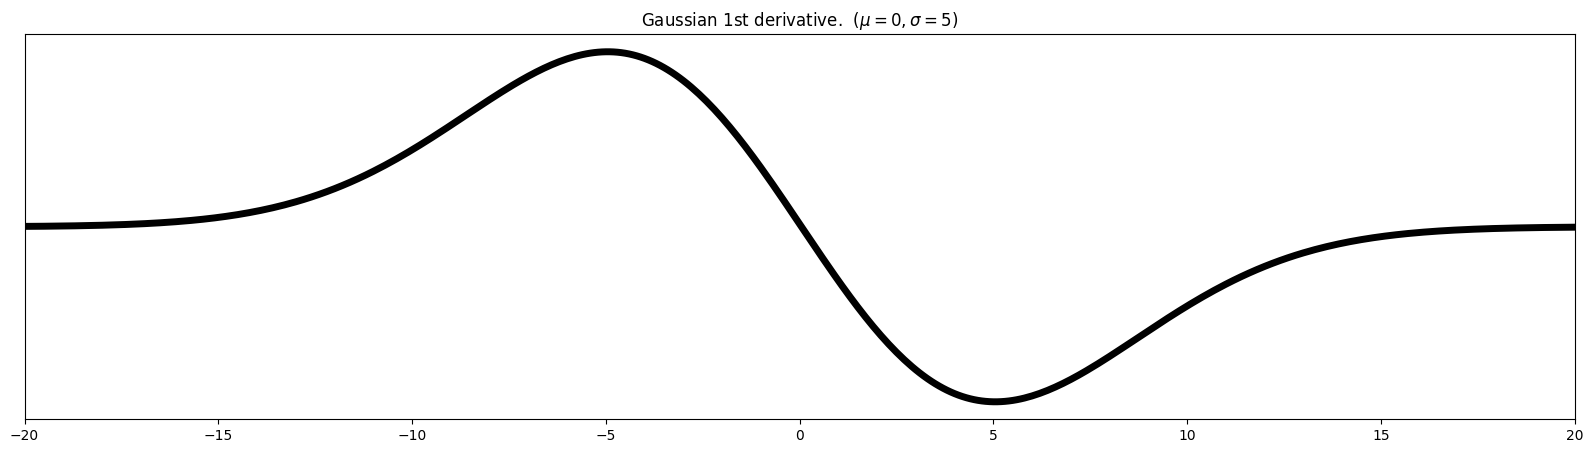

In [39]:
# 1D Gaussian - First Derivative
dg = np.convolve(g, Hx, 'same')

plt.figure(figsize=(20,5))
plt.plot(gxx, dg, 'k', linewidth=5)
plt.xlim([-s*sigma, s*sigma])
plt.yticks([])
plt.title(r'Gaussian 1st derivative.  ($\mu=0, \sigma=5$)');

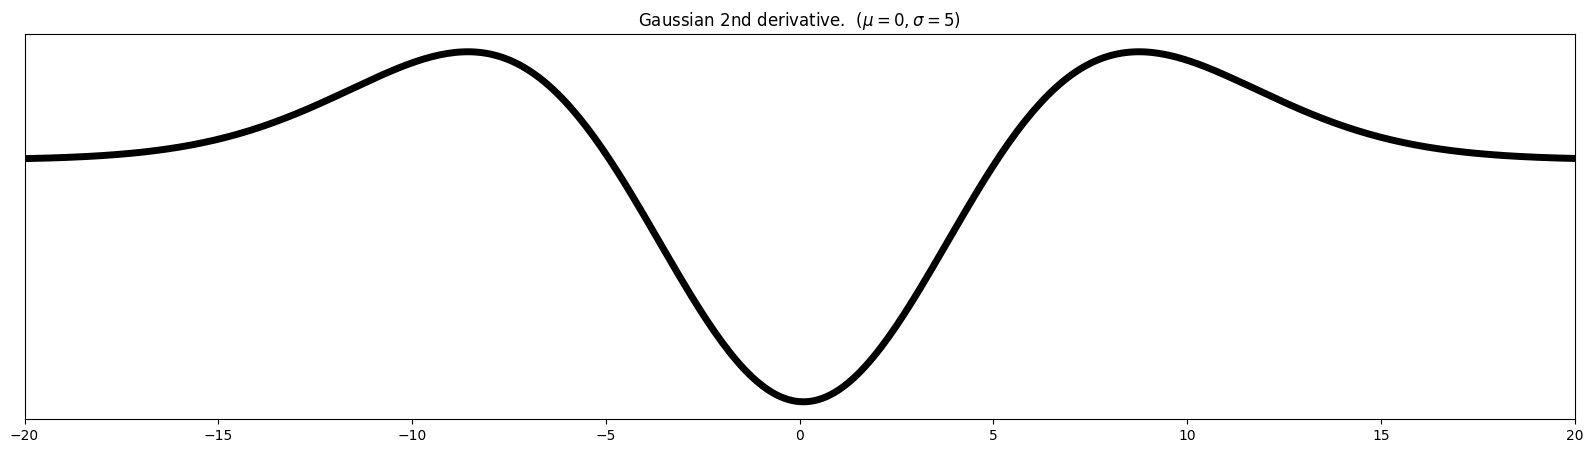

In [40]:
# 1D Guassian - Second Derviative
ddg = np.convolve(dg, Hx, 'same')

plt.figure(figsize=(20,5))
plt.plot(gxx, ddg, 'k', linewidth=5)
plt.xlim([-s*sigma, s*sigma])
plt.yticks([])
plt.title(r'Gaussian 2nd derivative.  ($\mu=0, \sigma=5$)');

In [41]:
# Setting up Gaussian and Gaussian derivative

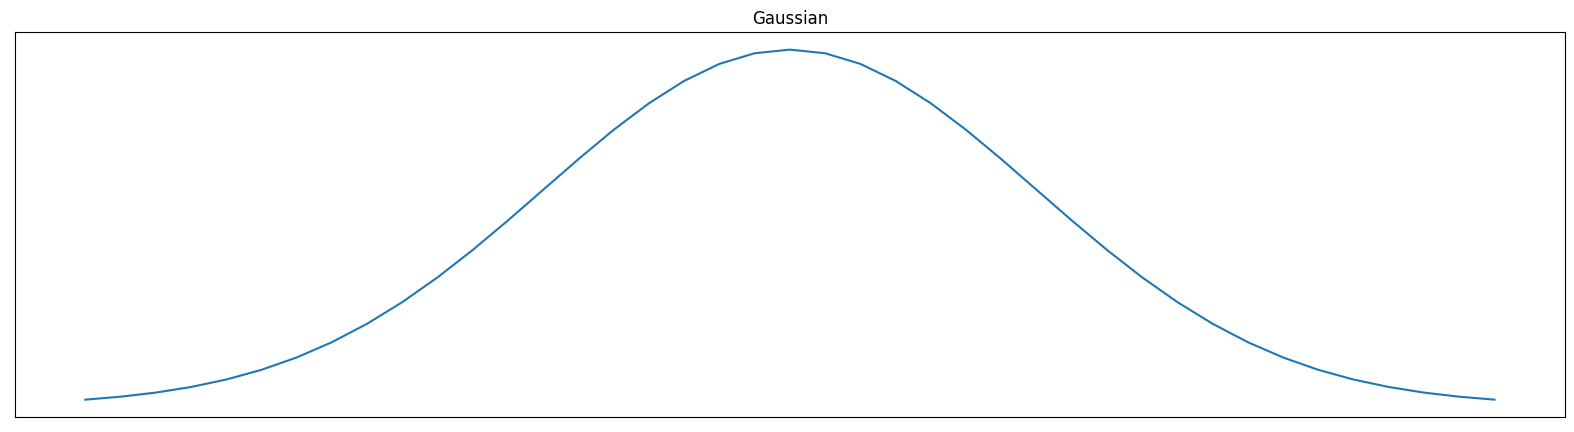

In [42]:
gxx = np.linspace(-20,20,41)
mu = 0
sigma = 7
g = np.exp(- (gxx-mu)**2 / (2*(sigma**2)) ) / ( 2 * np.pi * sigma)
plt.figure(figsize=(20,5))
plt.plot(gxx, g)
plt.xticks([])
plt.yticks([])
plt.title('Gaussian');

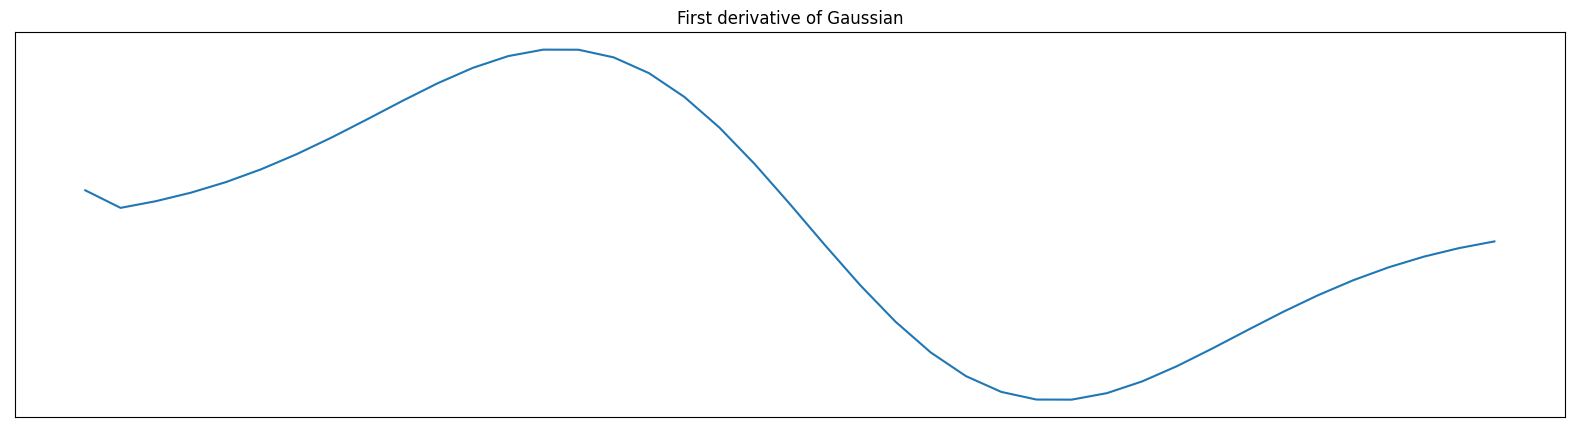

In [43]:
dg = np.convolve(g, Hx, 'same')
plt.figure(figsize=(20,5))
plt.plot(gxx, dg)
plt.xticks([])
plt.yticks([])
plt.title('First derivative of Gaussian');

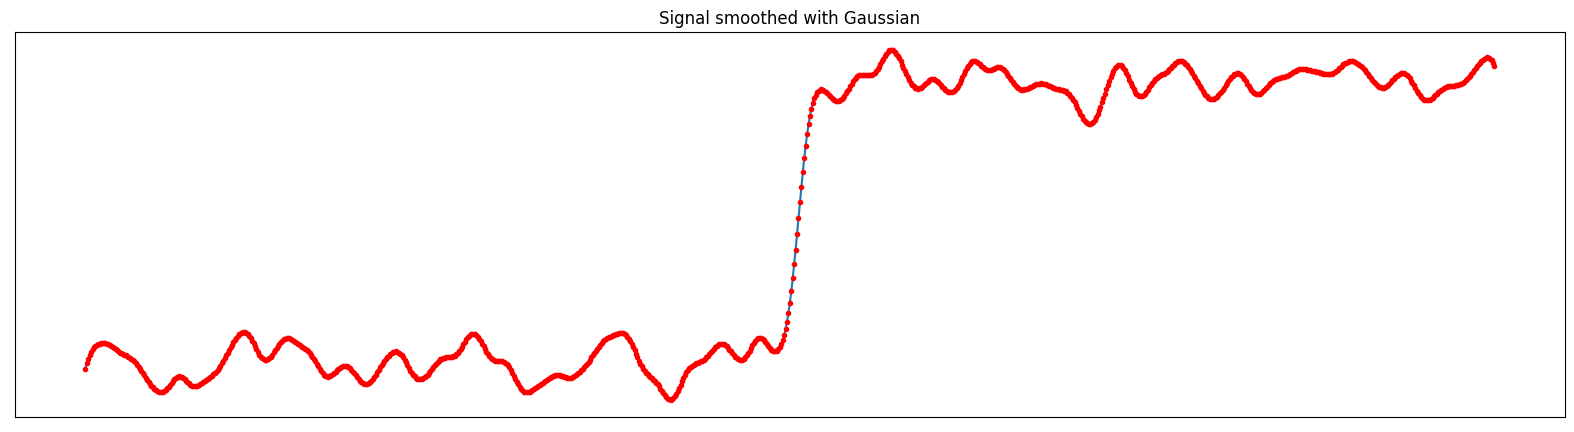

In [44]:
# Gaussian smoothing
gyn = np.convolve(yn, g, 'same')
plt.figure(figsize=(20,5))
plt.plot(x[5:-15], gyn[5:-15])
plt.plot(x[5:-15], gyn[5:-15],'r.')
plt.xticks([])
plt.yticks([])
plt.title('Signal smoothed with Gaussian');

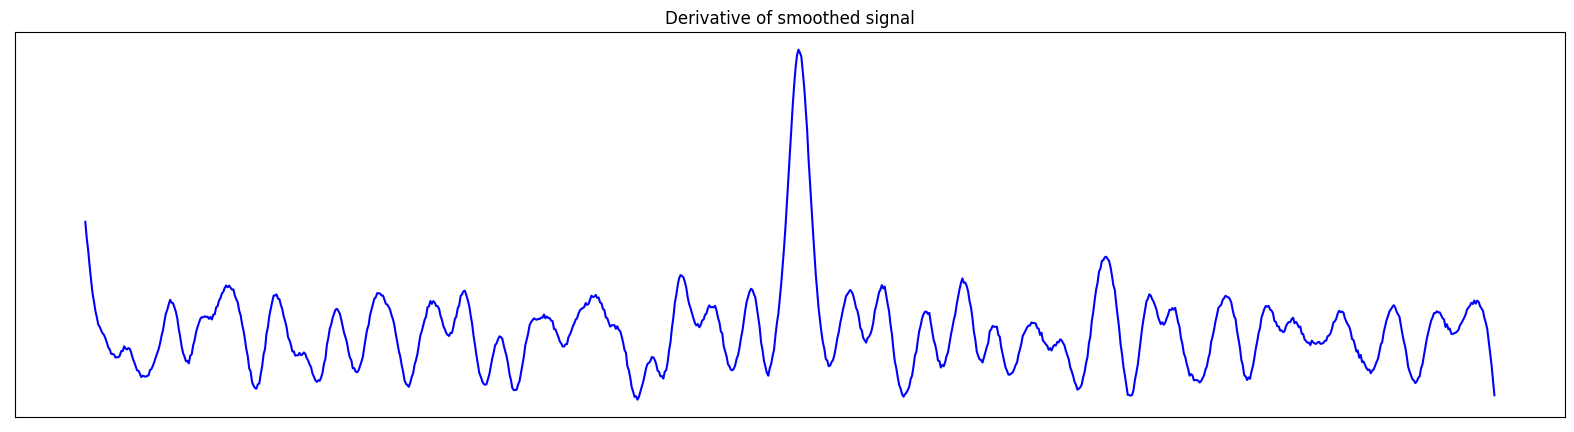

In [45]:
# Compute derivative of smoothed signal
dgyn = np.convolve(gyn, Hx, 'same')
plt.figure(figsize=(20,5))
plt.plot(x[5:-15], dgyn[5:-15], 'b')
plt.xticks([])
plt.yticks([])
plt.title('Derivative of smoothed signal');

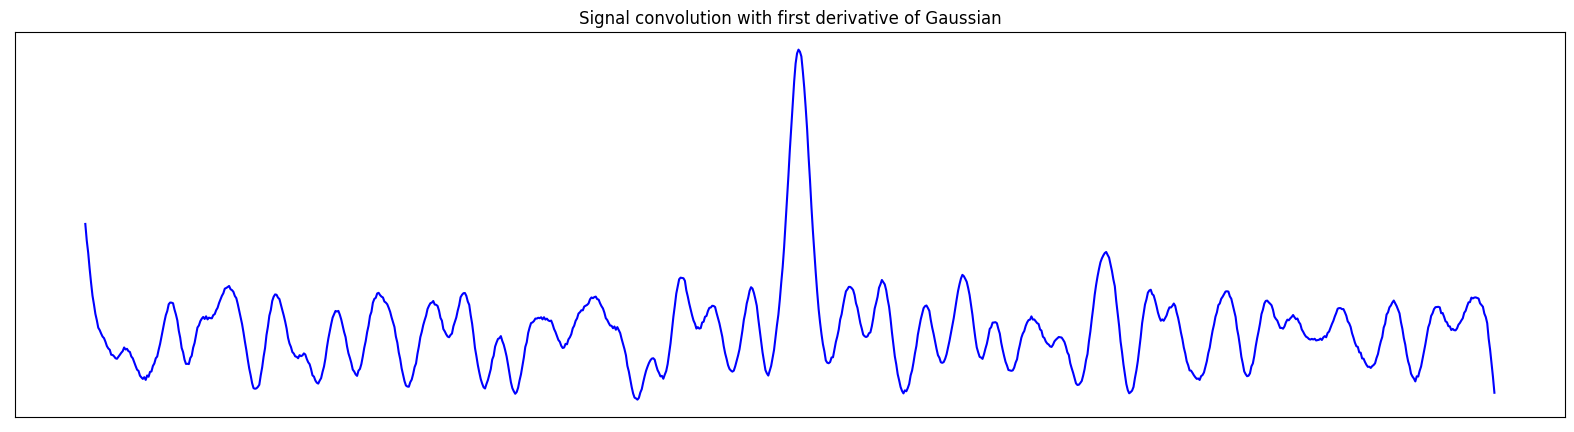

In [46]:
# Smooth signal with derivative of Gaussian
# Convolve noisy signal with derivative of Gaussian (saving one convolution operation)
dgyn2 = np.convolve(dg, yn, 'same')
plt.figure(figsize=(20,5))
plt.plot(x[5:-15], dgyn2[5:-15], 'b')
plt.xticks([])
plt.yticks([])
plt.title('Signal convolution with first derivative of Gaussian');